<a href="https://colab.research.google.com/github/dhyannn/reinforcment-learing/blob/main/514_RL_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bootstrapping in Reinforcement Learning (RL) is a method where the agent updates its estimate of how good a state (or action) is by combining:

The reward it gets immediately (short-term result).
The value it predicts for future states (long-term outcome).

The agent doesn’t wait to explore every possible route or calculate rewards for all steps upfront. Instead:

It "bootstraps" from its current guess, using the current reward and its predictions for future states to improve its understanding step by step.

In [ ]:
import numpy as np


In [ ]:
grid_size = 4
num_states = grid_size * grid_size
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate


In [ ]:
# Actions: up, down, left, right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # (row change, column change)

# Reward structure
reward = np.zeros((grid_size, grid_size))
reward[-1, -1] = 1  # Goal state reward

In [ ]:
# Initialize state-value function
V = np.zeros((grid_size, grid_size))

def is_valid_state(row, col):
    """Check if the state is within the grid boundaries."""
    return 0 <= row < grid_size and 0 <= col < grid_size

def take_action(state, action):
    """Take an action and return the next state and reward."""
    row, col = state
    new_row, new_col = row + action[0], col + action[1]

    if not is_valid_state(new_row, new_col):
        return state, reward[row, col]  # Invalid move, stay in the same state

    return (new_row, new_col), reward[new_row, new_col]


In [ ]:
for episode in range(50):  # Number of episodes
    # Start at the top-left corner
    state = (0, 0)

    while state != (grid_size - 1, grid_size - 1):  # Until reaching the goal
        # Randomly select an action
        action = actions[np.random.choice(len(actions))]

        # Take the action and observe the next state and reward
        next_state, reward_obtained = take_action(state, action)

        # Update the value function using bootstrapping (TD(0) update rule)
        V[state] += alpha * (reward_obtained + gamma * V[next_state] - V[state])

        # Move to the next state
        state = next_state


In [ ]:
print("Learned State-Value Function:")
print(np.round(V, 2))


Learned State-Value Function:
[[0.05 0.06 0.09 0.12]
 [0.06 0.1  0.19 0.23]
 [0.08 0.17 0.34 0.55]
 [0.13 0.27 0.4  0.  ]]


The **state-value function** represents how "good" each state (or grid cell) is for the agent in terms of achieving its goal. Each number in the grid corresponds to the agent's learned estimate of the **expected total reward** it can achieve starting from that cell and following the optimal policy.

### Breakdown of the Learned Values:
1. **Small values (near the top-left)**:
   - States with smaller values (e.g., `0.05` in the top-left corner) are far from the goal.
   - The agent expects to collect a lower total reward from these states because it has to travel a longer distance to reach the goal.

2. **Larger values (closer to the bottom-right)**:
   - States with larger values (e.g., `0.55` in the bottom row near the goal) are close to the goal.
   - The agent expects a higher total reward from these states because it’s easier to reach the goal quickly.

3. **Goal state (bottom-right corner)**:
   - The value is `0` because the agent receives an immediate reward for reaching the goal, and there are no future rewards beyond that point. It doesn't need to estimate anything further.

### Key Observations:
- The values **gradually increase as the agent gets closer to the goal**. This reflects the agent's learning process: the closer it is to the reward, the higher its confidence about achieving it.
- The agent has learned the structure of the grid: states closer to the goal are more valuable, and this knowledge guides its future decisions.

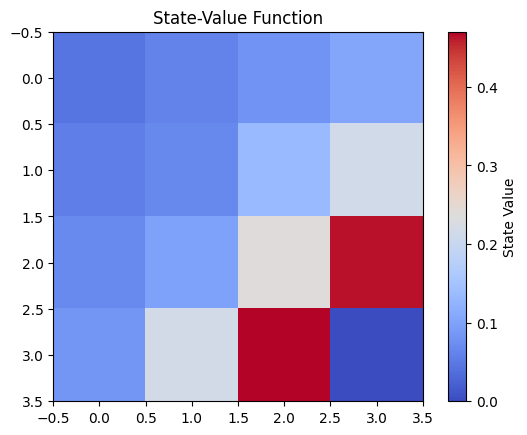

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(V, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="State Value")
plt.title("State-Value Function")
plt.show()


In the grid-world:

Each cell represents a location.
The agent updates the value of its current location by combining:
The immediate reward (e.g., +1 for reaching the goal).

The estimated value of the next cell it plans to move to.

Over time, the agent learns which paths and locations are better by continuously improving its estimates using this approach.